In [75]:
from stats import correlation, standard_deviation, mean, de_mean

def predict(alpha, beta, x_i):
    return beta * x_i + alpha

def error(alpha, beta, x_i, y_i):
    """실제 결과가 y_i라고 할 때, beta*x_i+alpha로 계산된 예측값의 오류"""
    return y_i - predict(alpha, beta, x_i)\

def sumOfSquaredErrors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x,y))

def leastSquaresFit(x, y):  # 최소자승법
    """x와 y가 학습 데이터로 주어졌을 때
    오류의 제곱 값을 최소화해 주는 알파와 베타 계산"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

표준편차 다시 짚기
산포도를 나타내는 수치로 분산의 제곱근.
확률 변수 X의 표준편차는 다음과 같다.

$\sigma = \sqrt{\operatorname{E}(X-\operatorname{E}(X))^2} = \sqrt{\operatorname{E}(X^2) - (\operatorname{E}(X))^2}$

오류 최소화 방법이 왜 말이 될까? 독립 변수 x의 평균이 주어지면, 알파는 종속 변수 y의 평균을 예측해 준다.
베타는 입력 변수가 standard_deviation(x)만큼 증가한다면 예측값 또한 correlation(x,y) x standard_deviation(y)만큼 증가한다는 것을 의미한다. **x와 y가 완벽한 양의 상관관계를 지닌다면, x가 1 표준편차 증가할 때마다 y또한 1 표준편차만큼 증가한다.** x와 y가 완벽한 음의 상관관계를 지닌다면, x가 증가할 때 y가 감소한다. 상관 관계가 0이라면 베타는 0이 되며, x가 예측에 아무 영향이 없다는 걸 의미한다.

In [1]:
num_friends = [49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

alpha, beta = leastSquaresFit(num_friends, daily_minutes)


NameError: name 'leastSquaresFit' is not defined

In [66]:
print(alpha, beta)

alphax = []

for i in range(51):
    alphax.append((i+alpha)*beta)


22.94755241346903 0.903865945605865


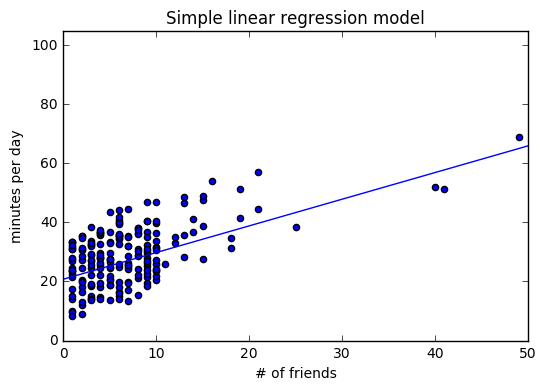

In [68]:
from matplotlib import pyplot as plt
plt.scatter(num_friends, daily_minutes)
plt.plot(alphax)
plt.title("Simple linear regression model")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.axis([0,50,0,105])
plt.show()

In [73]:
def totalSumOfSquares(y):
    """평균을 기준으로 y_i의 변화량을 제곱한 값의 총합"""
    return sum(v ** 2 for v in de_mean(y))

def rSquared(alpha, beta, x, y):
    """모델이 잡아낼 수 있는 변화량의 비는 1 - 모델이 잡아낼 수 없는 변화량의 비이다."""
    """모델이 잡아낼 수 없는 변화량 = 오류 / 평균 기준 y_i 변화량의 총값"""
    return 1.0 - (sumOfSquaredErrors(alpha, beta, x, y) / totalSumOfSquares(y))

In [76]:
rSquared(alpha, beta, num_friends, daily_minutes)

0.3291078377836305

In [87]:
from gradient_descent import minimize_stochastic
import random

def squaredError(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squaredErrorGradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),       # 알파에 대한 편미분
            -2 * error(alpha, beta, x_i, y_i) * x_i]  # 베타에 대한 편미분

random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squaredError,
                                 squaredErrorGradient,
                                 num_friends,
                                 daily_minutes,
                                 theta,
                                 0.0001)

In [91]:
beta

0.9043371597664965

$$\sigma = \sqrt{\operatorname{E}(X-\operatorname{E}(X))^2} = \sqrt{\operatorname{E}(X^2) - (\operatorname{E}(X))^2}$$